In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pickle
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 12,6

In [106]:
full_task2_df = pd.read_pickle("full_task2_df.pkl")

In [50]:
BeforeNationalDay = (
    datetime.date(2016, 9, 30),
)

NationalDayFront = (
    datetime.date(2016, 10, 1), 
    datetime.date(2016, 10, 2),
    datetime.date(2016, 10, 3),
    datetime.date(2016, 10, 4), 
)

NationalDayTail = (
    datetime.date(2016, 10, 5),
    datetime.date(2016, 10, 6), 
    datetime.date(2016, 10, 7)
)

WorkingWeekend = (
    datetime.date(2016, 9, 18), 
    datetime.date(2016, 10, 8), 
    datetime.date(2016, 10, 9)
)

In [110]:
def get_peak(date):
    if 7 <= date.hour <= 9:
        return "EarlyPeakTrafficTime"
    if 17 <= date.hour <= 20:
        return "LatePeakTrafficTime"
    return "NormalTrafficTime"

In [62]:
full_task2_df.index = pd.to_datetime(full_task2_df.index)

In [119]:
def get_day(date):
    dayofweek = date.dayofweek
    date = date.date()
    if date in BeforeNationalDay:
        return "BeforeNationalDay"
    if date in NationalDayFront:
        return "NationalDayFront(1-4)"
    if date in NationalDayTail:
        return "NationalDayTail(5-7)"
    if date in WorkingWeekend:
        return "WorkingWeekend"
    if dayofweek in (0, 1, 2, 3, 4):
        return "WorkingDay"
    else:
        return "Weekend"

In [132]:
full_task2_df = pd.read_pickle("peak_new_full_task2.pkl")

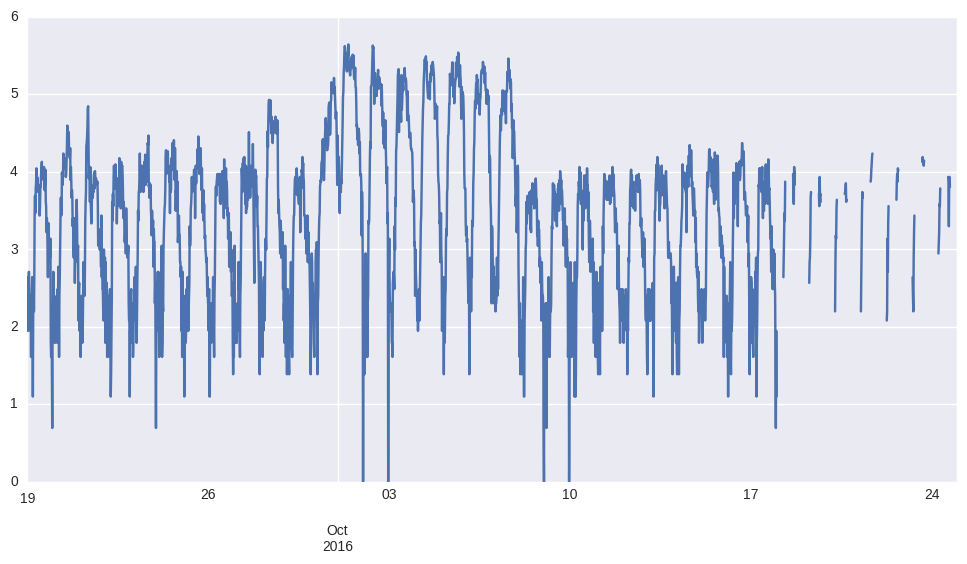

In [139]:
np.log(full_task2_df.T1D0 + 1).plot()

In [121]:
del full_task2_df['Holiday']
del full_task2_df['WorkingDay']
del full_task2_df['Weekend']

In [122]:
peakDummies = pd.get_dummies(full_task2_df.index.map(get_peak))
peakDummies.index = full_task2_df.index

In [123]:
dayTypeDummies = pd.get_dummies(full_task2_df.index.map(get_day))
dayTypeDummies.index = full_task2_df.index

In [124]:
full_task2_df = full_task2_df.join(dayTypeDummies)

In [125]:
full_task2_df = full_task2_df.join(peakDummies)

In [126]:
full_task2_df.columns

Index(['T1D0', 'T1D1', 'T2D0', 'T3D0', 'T3D1', 'DayOfWeek', 'HeavyRain',
       'LightRain', 'Rain', 'Sunny', 'BeforeNationalDay',
       'NationalDayFront(1-4)', 'NationalDayTail(5-7)', 'Weekend',
       'WorkingDay', 'WorkingWeekend', 'EarlyPeakTrafficTime',
       'LatePeakTrafficTime', 'NormalTrafficTime'],
      dtype='object')

In [127]:
full_task2_df = full_task2_df[['T1D0', 'T1D1', 'T2D0', 'T3D0', 'T3D1',
                               'HeavyRain', 'LightRain', 'Rain', 'Sunny',
                               'EarlyPeakTrafficTime', 'LatePeakTrafficTime', 'NormalTrafficTime',
                               'DayOfWeek', 'BeforeNationalDay', 'NationalDayFront(1-4)', 'NationalDayTail(5-7)', 'Weekend', 'WorkingDay', 'WorkingWeekend'
                               ]]

In [129]:
full_task2_df.to_pickle('peak_new_full_task2.pkl')

In [128]:
full_task2_df

,T1D0,T1D1,T2D0,T3D0,T3D1,HeavyRain,LightRain,Rain,Sunny,EarlyPeakTrafficTime,LatePeakTrafficTime,NormalTrafficTime,DayOfWeek,BeforeNationalDay,NationalDayFront(1-4),NationalDayTail(5-7),Weekend,WorkingDay,WorkingWeekend
2016-09-19 00:00:00,13.0,140.0,2.0,17.0,181.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 00:20:00,6.0,56.0,0.0,16.0,112.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 00:40:00,9.0,31.0,0.0,16.0,93.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 01:00:00,10.0,4.0,1.0,17.0,4.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 01:20:00,14.0,14.0,0.0,17.0,5.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 01:40:00,10.0,7.0,2.0,11.0,4.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 02:00:00,7.0,7.0,0.0,11.0,5.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 02:20:00,10.0,7.0,0.0,14.0,4.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 02:40:00,6.0,10.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
2016-09-19 03:00:00,9.0,10.0,0.0,10.0,5.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0,0,0,0,1,0
